In [1]:
from tpg.qlearner import QLearner
from tpg.gridworld import GridWorld

import numpy as np
import matplotlib.pyplot as plt

In [2]:
qLearner = QLearner(25, 4, 0.8, 0.001)

In [3]:
width = 5
height = 5
targetCell = (4, 4)
walls = [(2, 2), (3, 2), (1, 4), (4, 3)]  # Define wall positions
numEpisodes = 1000
epsilon = 0.25

env = GridWorld(width, height, targetCell, walls)

In [4]:
randomRewards = []
randomNumSteps = []
    
for episode in range(numEpisodes):
    env.reset()
    totalReward = 0
    numSteps = 0
    previousState = env.getState()

    while not env.isTerminal():
        #env.display()
        action = np.random.randint(4)  # Random action
        
        nextState, reward = env.step(action)

        totalReward += reward
        previousState = nextState
        
        numSteps = numSteps + 1
            
        #print("Reward:", reward)
 
    randomNumSteps.append(numSteps)
    randomRewards.append(totalReward)
    #env.display()
    print("Episode {} completed. Total reward: {}".format(episode, totalReward))


Episode 0 completed. Total reward: 17.0
Episode 1 completed. Total reward: 75.0
Episode 2 completed. Total reward: -33.0
Episode 3 completed. Total reward: 63.0
Episode 4 completed. Total reward: -266.0
Episode 5 completed. Total reward: 51.0
Episode 6 completed. Total reward: 19.0
Episode 7 completed. Total reward: -13.0
Episode 8 completed. Total reward: -45.0
Episode 9 completed. Total reward: -432.0
Episode 10 completed. Total reward: 92.0
Episode 11 completed. Total reward: -61.0
Episode 12 completed. Total reward: -152.0
Episode 13 completed. Total reward: 45.0
Episode 14 completed. Total reward: 74.0
Episode 15 completed. Total reward: -61.0
Episode 16 completed. Total reward: 72.0
Episode 17 completed. Total reward: -53.0
Episode 18 completed. Total reward: 62.0
Episode 19 completed. Total reward: 12.0
Episode 20 completed. Total reward: -199.0
Episode 21 completed. Total reward: -29.0
Episode 22 completed. Total reward: 14.0
Episode 23 completed. Total reward: 93.0
Episode 24 

In [5]:
perceptronRewards = []
perceptronNumSteps = []
    
for episode in range(numEpisodes):
    env.reset()
    totalReward = 0
    numSteps = 0
    previousState = env.getState()

    while not env.isTerminal():
        #env.display()
        
        # ε-greedy Action Selection
        if np.random.random() < epsilon:
            action = np.random.randint(4)  # Random action with probability ε
        else:
            action = qLearner.predict(previousState).argmax()
            
        
        nextState, reward = env.step(action)
        totalReward += reward
        
        #if reward < 0:  # If the agent moved into a wall, reset to the initial position
            #env.reset()
            
        qLearner.train(previousState, nextState, reward, action)
        previousState = nextState
        
        numSteps = numSteps + 1
            
        #print("Reward:", reward)
 
    perceptronNumSteps.append(numSteps)
    perceptronRewards.append(totalReward)
    
    print("Episode {} completed. Total reward: {}".format(episode, totalReward))


Episode 0 completed. Total reward: -679.0
Episode 1 completed. Total reward: -166.0
Episode 2 completed. Total reward: -100.0
Episode 3 completed. Total reward: -241.0
Episode 4 completed. Total reward: -18.0
Episode 5 completed. Total reward: -596.0
Episode 6 completed. Total reward: -290.0
Episode 7 completed. Total reward: -9.0
Episode 8 completed. Total reward: -60.0
Episode 9 completed. Total reward: -429.0
Episode 10 completed. Total reward: -66.0
Episode 11 completed. Total reward: -53.0
Episode 12 completed. Total reward: -83.0
Episode 13 completed. Total reward: -2.0
Episode 14 completed. Total reward: -58.0
Episode 15 completed. Total reward: -346.0
Episode 16 completed. Total reward: -54.0
Episode 17 completed. Total reward: -441.0
Episode 18 completed. Total reward: -66.0
Episode 19 completed. Total reward: -318.0
Episode 20 completed. Total reward: 0.0
Episode 21 completed. Total reward: -31.0
Episode 22 completed. Total reward: -46.0
Episode 23 completed. Total reward: 23

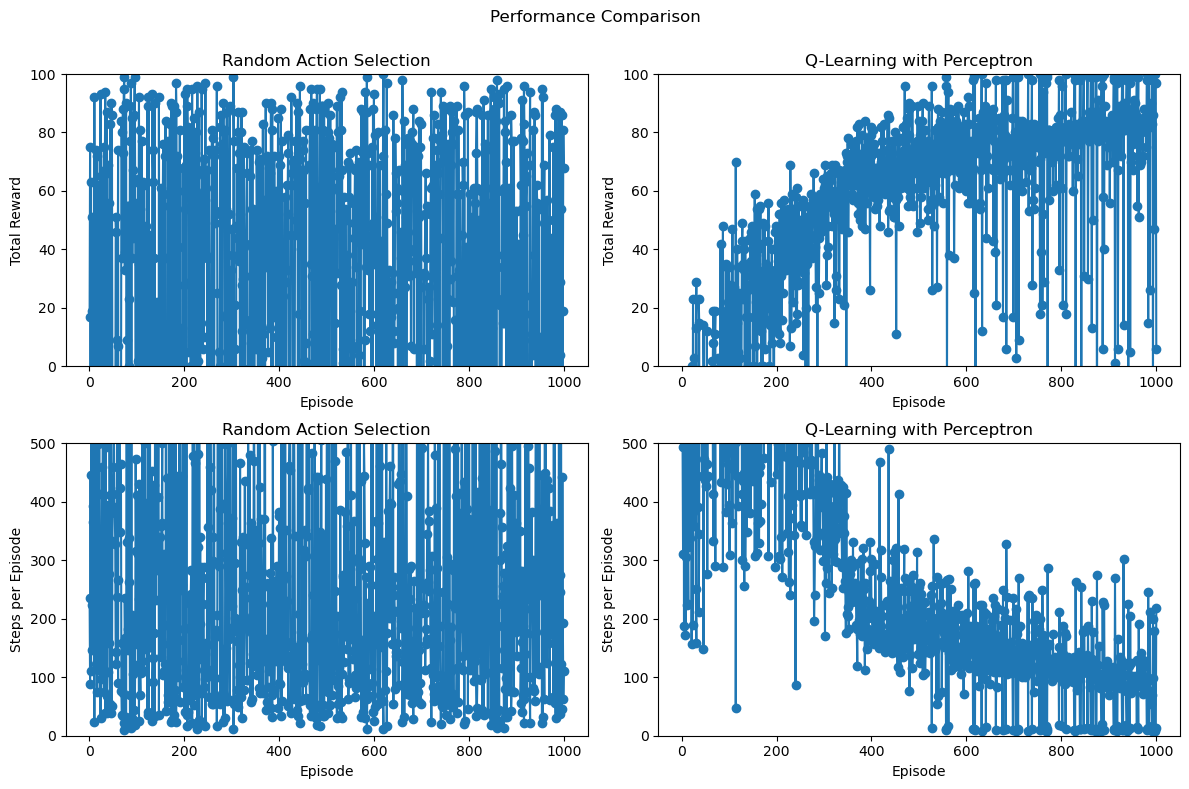

In [6]:
# Create subplots for side-by-side comparison
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Performance Comparison')

# Plot total rewards over episodes for random action selection
axs[0, 0].plot(range(1, numEpisodes + 1), randomRewards, marker='o')
axs[0, 0].set_title('Random Action Selection')
axs[0, 0].set_xlabel('Episode')
axs[0, 0].set_ylabel('Total Reward')
axs[0, 0].set_ylim((0, 100))

# Plot total rewards over episodes for Q-learning with the perceptron
axs[0, 1].plot(range(1, numEpisodes + 1), perceptronRewards, marker='o')
axs[0, 1].set_title('Q-Learning with Perceptron')
axs[0, 1].set_xlabel('Episode')
axs[0, 1].set_ylabel('Total Reward')
axs[0, 1].set_ylim((0, 100))

# Plot steps per episode for random action selection
axs[1, 0].plot(range(1, numEpisodes + 1), randomNumSteps, marker='o')
axs[1, 0].set_title('Random Action Selection')
axs[1, 0].set_xlabel('Episode')
axs[1, 0].set_ylabel('Steps per Episode')
axs[1, 0].set_ylim((0, 500))

# Plot steps per episode for Q-learning with the perceptron
axs[1, 1].plot(range(1, numEpisodes + 1), perceptronNumSteps, marker='o')
axs[1, 1].set_title('Q-Learning with Perceptron')
axs[1, 1].set_xlabel('Episode')
axs[1, 1].set_ylabel('Steps per Episode')
axs[1, 1].set_ylim((0, 500))

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [7]:
optimalRewards = []
optimalNumSteps = []

maxSteps = 500
currentSteps = 0

for episode in range(1):

    env.reset()
    totalReward = 0
    numSteps = 0
    previousState = env.getState()

    while not env.isTerminal():
        if currentSteps > maxSteps:
            print("Maximum number of steps exceeded in episode.")
            break

        env.display()
        
        
        action = qLearner.predict(previousState).argmax()    
        
        nextState, reward = env.step(action)
        totalReward += reward
        previousState = nextState
        
        numSteps = numSteps + 1
            
        print("Reward:", reward)
        currentSteps += 1
 
    optimalNumSteps.append(numSteps)
    optimalRewards.append(totalReward)
    env.display()
    print("Episode {} completed. Total reward: {}".format(episode, totalReward))


P 0 0 0 0
0 0 0 0 0
0 0 X X 0
0 0 0 0 X
0 X 0 0 G

Reward: 0.0
0 0 0 0 0
P 0 0 0 0
0 0 X X 0
0 0 0 0 X
0 X 0 0 G

Reward: 0.0
0 0 0 0 0
0 0 0 0 0
P 0 X X 0
0 0 0 0 X
0 X 0 0 G

Reward: 0.0
0 0 0 0 0
0 0 0 0 0
0 P X X 0
0 0 0 0 X
0 X 0 0 G

Reward: 0.0
0 0 0 0 0
0 0 0 0 0
0 0 X X 0
0 P 0 0 X
0 X 0 0 G

Reward: 0.0
0 0 0 0 0
0 0 0 0 0
0 0 X X 0
0 0 P 0 X
0 X 0 0 G

Reward: 0.0
0 0 0 0 0
0 0 0 0 0
0 0 X X 0
0 0 0 P X
0 X 0 0 G

Reward: 0.0
0 0 0 0 0
0 0 0 0 0
0 0 X X 0
0 0 0 0 X
0 X 0 P G

Reward: 100.0
0 0 0 0 0
0 0 0 0 0
0 0 X X 0
0 0 0 0 X
0 X 0 0 G

Episode 0 completed. Total reward: 100.0
